First:
- go to the terminal
- go to the `4_tuning_networks` folder, use `cd` to get there, or `z` to get there faster.
- if you are planning on closing the laptop to let this run by itself, start a tmux session by giving the command `tmux`. You can name the session with `ctrl+b $`, leave the tmux with `ctrl+b` d, access it again with `tmux a -t 0` or replace the 0 with the name you gave it. See [tmux](https://github.com/tmux/tmux/wiki/Getting-Started) for more info.
- Activate the `.venv`, and run `python hypertune.py`
- In the hypertune.py file, a tune_dir is specified: `models/ray`. We will check the contents of that folder after the hypertune finished. You can also use tensorboard to check the results. 
- this will take some time. I clocked 1901 seconds (30 minutes) on the VM

 0.0992908 |           119 |            3 |     26 |         576.744  |    0 |   0.942187

In [28]:
from pathlib import Path
tune_dir = Path("models/ray").resolve()
tune_dir.exists()
tunelogs = [d for d in tune_dir.iterdir()]
tunelogs.sort()
tunelogs

[WindowsPath('C:/Users/Francesca/Documents/osint/code_repo/AI/MADS-MachineLearning-FP/dev/notebooks/4_tuning_networks/models/ray/tune_different_models_2024-12-13_19-35-19'),
 WindowsPath('C:/Users/Francesca/Documents/osint/code_repo/AI/MADS-MachineLearning-FP/dev/notebooks/4_tuning_networks/models/ray/tune_different_models_2024-12-13_20-27-53'),
 WindowsPath('C:/Users/Francesca/Documents/osint/code_repo/AI/MADS-MachineLearning-FP/dev/notebooks/4_tuning_networks/models/ray/tune_different_models_2024-12-13_20-30-39'),
 WindowsPath('C:/Users/Francesca/Documents/osint/code_repo/AI/MADS-MachineLearning-FP/dev/notebooks/4_tuning_networks/models/ray/tune_different_models_2024-12-13_20-37-11'),
 WindowsPath('C:/Users/Francesca/Documents/osint/code_repo/AI/MADS-MachineLearning-FP/dev/notebooks/4_tuning_networks/models/ray/tune_different_models_2024-12-14_20-50-31'),
 WindowsPath('C:/Users/Francesca/Documents/osint/code_repo/AI/MADS-MachineLearning-FP/dev/notebooks/4_tuning_networks/models/ray/t

In [29]:
tunelogs = [d for d in tune_dir.iterdir()]
tunelogs.sort()
latest = tunelogs[-1]
latest

WindowsPath('C:/Users/Francesca/Documents/osint/code_repo/AI/MADS-MachineLearning-FP/dev/notebooks/4_tuning_networks/models/ray/tune_two_models_2024-12-12_20-51-43')

In [30]:
Path(latest).name

'tune_two_models_2024-12-12_20-51-43'

In [31]:
from ray.tune import ExperimentAnalysis
import ray
ray.init(ignore_reinit_error=True)


analysis = ExperimentAnalysis(latest)


2024-12-15 11:19:32,356	INFO worker.py:1652 -- Calling ray.init() again after it has already been called.


So, we find some info:

In [32]:
analysis.results_df.columns


Index(['valid_loss', 'train_loss', 'accuracy', 'timestamp',
       'checkpoint_dir_name', 'done', 'training_iteration', 'date',
       'time_this_iter_s', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'iterations_since_restore', 'experiment_tag',
       'config/input_size', 'config/output_size', 'config/dropout',
       'config/hidden_size', 'config/num_layers', 'config/epochs',
       'config/tune_dir', 'config/choice'],
      dtype='object')

In [34]:
analysis.dataframe()

,valid_loss,train_loss,accuracy,timestamp,checkpoint_dir_name,done,training_iteration,trial_id,date,time_this_iter_s,...,iterations_since_restore,config/input_size,config/output_size,config/dropout,config/hidden_size,config/num_layers,config/epochs,config/tune_dir,config/choice,logdir
0,0.072705,0.096459,0.987500,1734036213,None,True,5,82dd5_00015,2024-12-12_21-43-33,420.663996,...,5,3,20,0.1,855,4,5,C:\Users\Francesca\Documents\osint\code_repo\A...,1,82dd5_00015
1,0.127791,0.094127,0.965625,1734034176,None,True,5,82dd5_00002,2024-12-12_21-09-36,217.507021,...,5,3,20,0.1,456,4,5,C:\Users\Francesca\Documents\osint\code_repo\A...,1,82dd5_00002
2,0.108675,0.107138,0.976562,1734035962,None,True,5,82dd5_00000,2024-12-12_21-39-22,457.044585,...,5,3,20,0.1,806,4,5,C:\Users\Francesca\Documents\osint\code_repo\A...,1,82dd5_00000
3,0.076691,0.098495,0.981250,1734036302,None,True,5,82dd5_00006,2024-12-12_21-45-02,400.883196,...,5,3,20,0.1,889,4,5,C:\Users\Francesca\Documents\osint\code_repo\A...,1,82dd5_00006
4,1.380434,1.479869,0.409375,1734036603,None,True,5,82dd5_00009,2024-12-12_21-50-03,295.790601,...,5,3,20,0.1,994,4,5,C:\Users\Francesca\Documents\osint\code_repo\A...,0,82dd5_00009
5,1.236674,1.346505,0.504687,1734034421,None,True,5,82dd5_00004,2024-12-12_21-13-41,234.443259,...,5,3,20,0.1,454,4,5,C:\Users\Francesca\Documents\osint\code_repo\A...,0,82dd5_00004
6,1.706408,1.791243,0.315625,1734036027,None,True,5,82dd5_00017,2024-12-12_21-40-27,294.894838,...,5,3,20,0.1,647,4,5,C:\Users\Francesca\Documents\osint\code_repo\A...,0,82dd5_00017
7,0.021072,0.085059,0.993750,1734036276,None,True,5,82dd5_00012,2024-12-12_21-44-36,425.714766,...,5,3,20,0.1,886,4,5,C:\Users\Francesca\Documents\osint\code_repo\A...,1,82dd5_00012
8,0.061361,0.069046,0.984375,1734036325,None,True,5,82dd5_00016,2024-12-12_21-45-25,272.053889,...,5,3,20,0.1,775,4,5,C:\Users\Francesca\Documents\osint\code_repo\A...,1,82dd5_00016
9,0.100090,0.065478,0.970312,1734035567,None,True,5,82dd5_00008,2024-12-12_21-32-47,440.798274,...,5,3,20,0.1,740,4,5,C:\Users\Francesca\Documents\osint\code_repo\A...,1,82dd5_00008


Let's focus on the parameters we wanted to tune.

In [22]:
import plotly.express as px

plot = analysis.results_df
select = ["accuracy", "config/hidden_size", "config/dropout", "config/choice"]
p = plot[select].reset_index().dropna()


Let's sort by accuracy

In [23]:
p.sort_values("accuracy", inplace=True)

Make a parallel plot

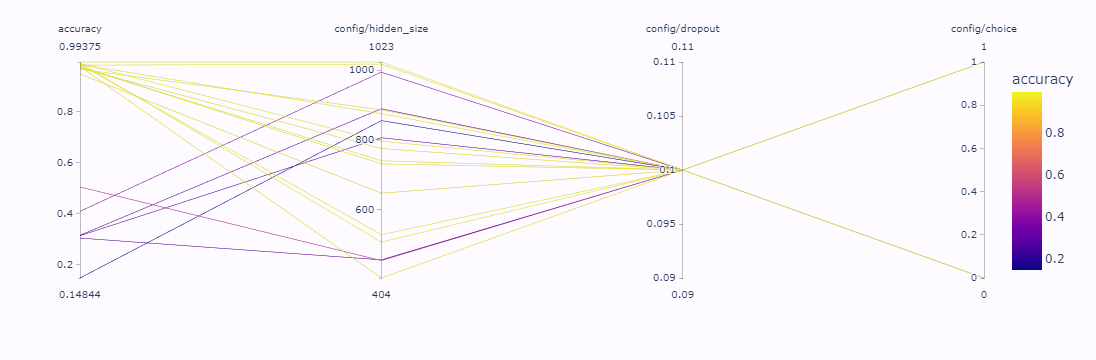

In [24]:
px.parallel_coordinates(p, color="accuracy")


<Axes: xlabel='config/hidden_size', ylabel='config/num_layers'>

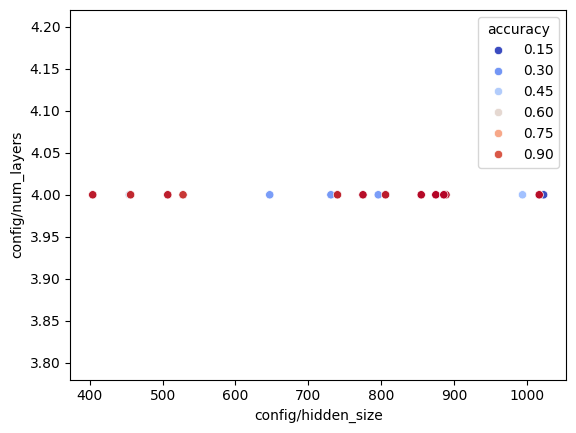

In [21]:
import seaborn as sns

sns.scatterplot(data=p, x="config/hidden_size", y="config/num_layers", hue="accuracy", palette="coolwarm")

C:\Users\Francesca\AppData\Local\Temp\ipykernel_1968\81415808.py:4: UserWarning:

KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.



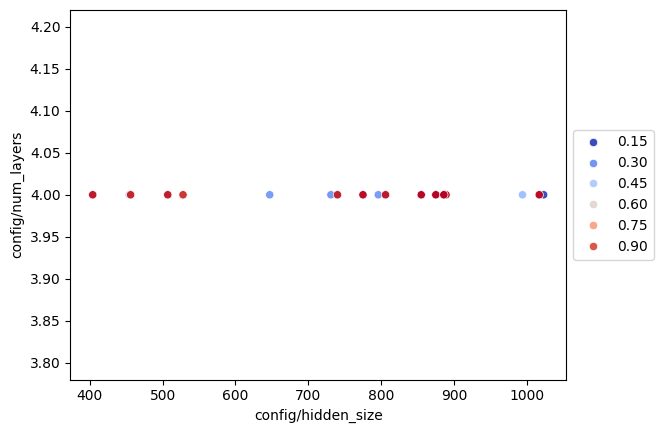

In [13]:
import matplotlib.pyplot as plt
cmap = sns.cubehelix_palette(as_cmap=True)
sns.scatterplot(data=p, x="config/hidden_size", y="config/num_layers", hue="accuracy", palette="coolwarm")
sns.kdeplot(data=p, x="config/hidden_size", y="config/num_layers", cmap=cmap)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

Get the best trial

In [17]:
analysis.get_best_trial(metric="test_loss", mode="min")


2024-12-15 11:10:19,020	WARNING experiment_analysis.py:558 -- Could not find best trial. Did you pass the correct `metric` parameter?


The top ten

In [15]:
p[-10:]


,trial_id,accuracy,config/hidden_size,config/dropout,config/num_layers
9,82dd5_00008,0.970312,740,0.1,4
16,82dd5_00013,0.973437,507,0.1,4
10,82dd5_00011,0.976562,404,0.1,4
2,82dd5_00000,0.976562,806,0.1,4
3,82dd5_00006,0.981250,889,0.1,4
8,82dd5_00016,0.984375,775,0.1,4
12,82dd5_00001,0.984375,1017,0.1,4
0,82dd5_00015,0.987500,855,0.1,4
13,82dd5_00003,0.990625,875,0.1,4
7,82dd5_00012,0.993750,886,0.1,4


Or the best config

In [17]:
analysis.get_best_config(metric="accuracy", mode="max")


{'input_size': 3,
 'output_size': 20,
 'dropout': 0.1,
 'hidden_size': 886,
 'num_layers': 4,
 'epochs': 5,
 'tune_dir': WindowsPath('C:/Users/Francesca/Documents/osint/code_repo/AI/MADS-MachineLearning-FP/dev/notebooks/4_tuning_networks/models/ray'),
 'choice': 1}